In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns


/home/saci/anaconda3/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
df = pd.read_csv('./recife-dados-despesas-2019.csv', sep=';', decimal=',') 

df

ano_movimentacao  mes_movimentacao  orgao_codigo  \
0                   2019                 5             9   
1                   2019                 1             9   
2                   2019                 3             9   
3                   2019                 7             9   
4                   2019                 9             9   
...                  ...               ...           ...   
116209              2019                 2            50   
116210              2019                 3            50   
116211              2019                 4            50   
116212              2019                 9            50   
116213              2019                11            50   

                                               orgao_nome unidade_codigo  \
0                         ASSESSORIA ESPECIAL DO PREFEITO          09.01   
1                         ASSESSORIA ESPECIAL DO PREFEITO          09.01   
2                         ASSESSORIA ESPECIAL DO PREFEITO          09.01   
3                         ASSESSORIA ESPECIAL DO PREFEITO          09.01   
4                         ASSESSORIA ESPECIAL DO PREFEITO          09.01   
...                                                   ...            ...   
116209  SECRETARIA DE INFRAESTRUTURA - ADMINISTRAÇÃO S...          50.10   
116210  SECRETARIA DE INFRAESTRUTURA - ADMINISTRAÇÃO S...          50.10   
116211  SECRETARIA DE INFRAESTRUTURA - ADMINISTRAÇÃO S...          50.10   
116212  SECRETARIA DE INFRAESTRUTURA - ADMINISTRAÇÃO S...          50.10   
116213  SECRETARIA DE INFRAESTRUTURA - ADMINISTRAÇÃO S...          50.10   

                                             unidade_nome  \
0       ASSESSORIA ESPECIAL DO PREFEITO - ADMINISTRAÇÃ...   
1       ASSESSORIA ESPECIAL DO PREFEITO - ADMINISTRAÇÃ...   
2       ASSESSORIA ESPECIAL DO PREFEITO - ADMINISTRAÇÃ...   
3       ASSESSORIA ESPECIAL DO PREFEITO - ADMINISTRAÇÃ...   
4       ASSESSORIA ESPECIAL DO PREFEITO - ADMINISTRAÇÃ...   
...                                                   ...   
116209  AUTARQUIA DE MANUTENÇÃO E LIMPEZA URBANA - EMLURB   
116210  AUTARQUIA DE MANUTENÇÃO E LIMPEZA URBANA - EMLURB   
116211  AUTARQUIA DE MANUTENÇÃO E LIMPEZA URBANA - EMLURB   
116212  AUTARQUIA DE MANUTENÇÃO E LIMPEZA URBANA - EMLURB   
116213  AUTARQUIA DE MANUTENÇÃO E LIMPEZA URBANA - EMLURB   

        categoria_economica_codigo categoria_economica_nome  \
0                                3       DESPESAS CORRENTES   
1                                3       DESPESAS CORRENTES   
2                                3       DESPESAS CORRENTES   
3                                3       DESPESAS CORRENTES   
4                                3       DESPESAS CORRENTES   
...                            ...                      ...   
116209                           3       DESPESAS CORRENTES   
116210                           3       DESPESAS CORRENTES   
116211                           3       DESPESAS CORRENTES   
116212                           3       DESPESAS CORRENTES   
116213                           3       DESPESAS CORRENTES   

        grupo_despesa_codigo          grupo_despesa_nome  ...  empenho_numero  \
0                          1  PESSOAL E ENCARGOS SOCIAIS  ...               1   
1                          1  PESSOAL E ENCARGOS SOCIAIS  ...               2   
2                          1  PESSOAL E ENCARGOS SOCIAIS  ...               2   
3                          1  PESSOAL E ENCARGOS SOCIAIS  ...               2   
4                          1  PESSOAL E ENCARGOS SOCIAIS  ...               2   
...                      ...                         ...  ...             ...   
116209                     3   OUTRAS DESPESAS CORRENTES  ...             219   
116210                     3   OUTRAS DESPESAS CORRENTES  ...             388   
116211                     3   OUTRAS DESPESAS CORRENTES  ...             641   
116212                     3   OUTRAS DESPESAS CORRENTES  ...            1

In [3]:
nomes = []
cod = []
df2 = df
for i in df2.axes[1]:
    if "nome" in i:
        nomes.append(i)
    if "codigo" in i:
        cod.append(i)
df2.drop(nomes, axis=1)
df3 = df
df3 = df3.drop(cod, axis=1)
#df2 não contém as colunas com os nomes, apenas os códigos.
df3.dtypes

ano_movimentacao               int64
mes_movimentacao               int64
orgao_nome                    object
unidade_nome                  object
categoria_economica_nome      object
grupo_despesa_nome            object
modalidade_aplicacao_nome     object
elemento_nome                 object
subelemento_nome              object
funcao_nome                   object
subfuncao_nome                object
programa_nome                 object
acao_nome                     object
fonte_recurso_nome            object
empenho_ano                    int64
empenho_modalidade_nome       object
empenho_numero                 int64
subempenho                     int64
indicador_subempenho          object
credor_nome                   object
modalidade_licitacao_nome     object
valor_empenhado              float64
valor_liquidado              float64
valor_pago                   float64
dtype: object

codigos={}
c=0
d = []
for index, row in df.iterrows():
    for x in nomes:
        if not x in d:
            d.append(x)
            codigos[row[cod[c]]] = row[x]
            c += 1
print (codigos)    
        
    
#set(df['grupo_despesa_nome'])
#df.head()


In [4]:
df.head()

ano_movimentacao  mes_movimentacao  orgao_codigo  \
0              2019                 5             9   
1              2019                 1             9   
2              2019                 3             9   
3              2019                 7             9   
4              2019                 9             9   

                        orgao_nome unidade_codigo  \
0  ASSESSORIA ESPECIAL DO PREFEITO          09.01   
1  ASSESSORIA ESPECIAL DO PREFEITO          09.01   
2  ASSESSORIA ESPECIAL DO PREFEITO          09.01   
3  ASSESSORIA ESPECIAL DO PREFEITO          09.01   
4  ASSESSORIA ESPECIAL DO PREFEITO          09.01   

                                        unidade_nome  \
0  ASSESSORIA ESPECIAL DO PREFEITO - ADMINISTRAÇÃ...   
1  ASSESSORIA ESPECIAL DO PREFEITO - ADMINISTRAÇÃ...   
2  ASSESSORIA ESPECIAL DO PREFEITO - ADMINISTRAÇÃ...   
3  ASSESSORIA ESPECIAL DO PREFEITO - ADMINISTRAÇÃ...   
4  ASSESSORIA ESPECIAL DO PREFEITO - ADMINISTRAÇÃ...   

   categoria_economica_codigo categoria_economica_nome  grupo_despesa_codigo  \
0                           3       DESPESAS CORRENTES                     1   
1                           3       DESPESAS CORRENTES                     1   
2                           3       DESPESAS CORRENTES                     1   
3                           3       DESPESAS CORRENTES                     1   
4                           3       DESPESAS CORRENTES                     1   

           grupo_despesa_nome  ...  empenho_numero subempenho  \
0  PESSOAL E ENCARGOS SOCIAIS  ...               1         85   
1  PESSOAL E ENCARGOS SOCIAIS  ...               2         81   
2  PESSOAL E ENCARGOS SOCIAIS  ...               2         83   
3  PESSOAL E ENCARGOS SOCIAIS  ...               2         87   
4  PESSOAL E ENCARGOS SOCIAIS  ...               2         89   

   indicador_subempenho credor_codigo           credor_nome  \
0                     x             0  CREDOR NÃO INFORMADO   
1                     x             0  CREDOR NÃO INFORMADO   
2                     x             0  CREDOR NÃO INFORMADO   
3                     x             0  CREDOR NÃO INFORMADO   
4                     x             0  CREDOR NÃO INFORMADO   

  modalidade_licitacao_codigo  modalidade_licitacao_nome valor_empenhado  \
0                           0              NÃO INFORMADA         4560.91   
1                           0              NÃO INFORMADA          604.50   
2                           0              NÃO INFORMADA          604.50   
3                           0              NÃO INFORMADA          604.50   
4                           0              NÃO INFORMADA          604.50   

   valor_liquidado valor_pago  
0          4560.91    4560.91  
1           604.50     604.50  
2           604.50     604.50  
3           604.50     604.50  
4           604.50     604.50  

[5 rows x 39 columns]

In [5]:
x = []
y = []
for index, row in df.iterrows():
    if (row['valor_pago'] <= 1000000 ):
        x.append(index)
    if (not row['credor_nome'] in y):
        y.append(row['credor_nome'])
df = df.drop(x)

In [6]:
y

['CREDOR NÃO INFORMADO',
 'RISETE CAVALCANTE DA SILVA',
 'GILSON JOSE DE SANTANA',
 'TIAGO BATISTA BARBOSA FERREIRA',
 'MONICA VALERIA DE HOLANDA CAVALCANTI',
 'CLEIDE ARAUJO DE SOUSA BARRETO',
 'MARDONIO DO NASCIMENTO SANTOS',
 'ARQUILLES ZACARIAS DE SANTANA',
 'JOSE RIBEIRO DA SILVA',
 'HILBERNON VIANA DE ARAUJO',
 'GIRLANE CRISTINA SIQUEIRA DA SILVA',
 'ELENILDO JOSE DA SILVA',
 'CARLOS EDUARDO XAVIER DE ANDRADE',
 'MARCELO ALVES SOARES',
 'ALEXANDRO SOBREIRA PEREIRA',
 'JOSE CARLOS DE OLIVEIRA LIRA',
 'MARIA ALICE ROCHA AMORIM',
 'ANTONIO ALVES DE ARAUJO',
 'MARIA DE FATIMA PONTES',
 'JOSE CLETO MACHADO DE OLIVEIRA',
 'MARIA DO SOCORRO DE ALMEIDA',
 'KLEIBER DAVID GOMES DOS SANTOS',
 'JOSE LEANDRO DE MORAIS',
 'CLOVIS PEREIRA CANHA FILHO',
 'ELIAS PEREIRA DA SILVA',
 'PAULO CORDEIRO DA CUNHA',
 'ROGER DE RENOR',
 'SEBASTIAO PEREIRA DAMASCENO NETO',
 'SALOMAO CUBITS',
 'MARIVALDO BUARQUE DE AQUINO',
 'MAURICIO CORREIA CEZAR NETO',
 'ANGELA MARIA FISCHER FERREIRA',
 'GILVAN BARBOSA D

In [7]:
print(df['valor_pago'].describe())

count    8.970000e+02
mean     2.964681e+06
std      3.488924e+06
min      1.001116e+06
25%      1.232340e+06
50%      1.838870e+06
75%      3.248336e+06
max      3.269529e+07
Name: valor_pago, dtype: float64


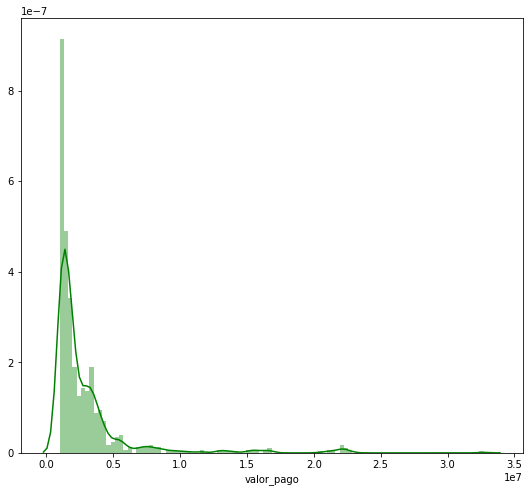

In [8]:
plt.figure(figsize=(9,8))
sns.distplot(df['valor_pago'], color='g', bins=100, hist_kws={'alpha': 0.4});

In [9]:
#del df['ano_movimentacao']
#del df['mes_movimentacao']
list(set(df.dtypes.tolist()))
df_num = df.select_dtypes(include = ['float64', 'int64'])
df_num.head()


ano_movimentacao  mes_movimentacao  orgao_codigo  \
131              2019                 3            13   
132              2019                 5            13   
167              2019                 2            14   
185              2019                 4            14   
269              2019                12            13   

     categoria_economica_codigo  grupo_despesa_codigo  \
131                           3                     1   
132                           3                     1   
167                           3                     1   
185                           3                     1   
269                           3                     1   

     modalidade_aplicacao_codigo  elemento_codigo  subelemento_codigo  \
131                           90               11                  99   
132                           90               11                  99   
167                           90               11                   1   
185                           90               11                   1   
269                           90               11                  43   

     funcao_codigo  subfuncao_codigo  ...  fonte_recurso_codigo  empenho_ano  \
131              3                91  ...                   100         2019   
132              3                91  ...                   100         2019   
167             12               361  ...                   112         2019   
185             12               361  ...                   112         2019   
269              3                91  ...                   100         2019   

     empenho_modalidade_codigo  empenho_numero  subempenho  credor_codigo  \
131                          0              69          83              0   
132                          0              69          85              0   
167                          0              89          82              0   
185                          0              89          84              0   
269                          0              65          92              0   

     modalidade_licitacao_codigo  valor_empenhado  valor_liquidado  valor_pago  
131                            0       1048117.71       1048117.71  1048117.71  
132                            0       1041569.38       1041569.38  1041569.38  
167                            0       3365336.33       3365336.33  3365336.33  
185                            0       3354484.79       3354484.79  3354484.79  
269                            0       2509515.97       2509515.97  2509515.97  

[5 rows x 22 columns]

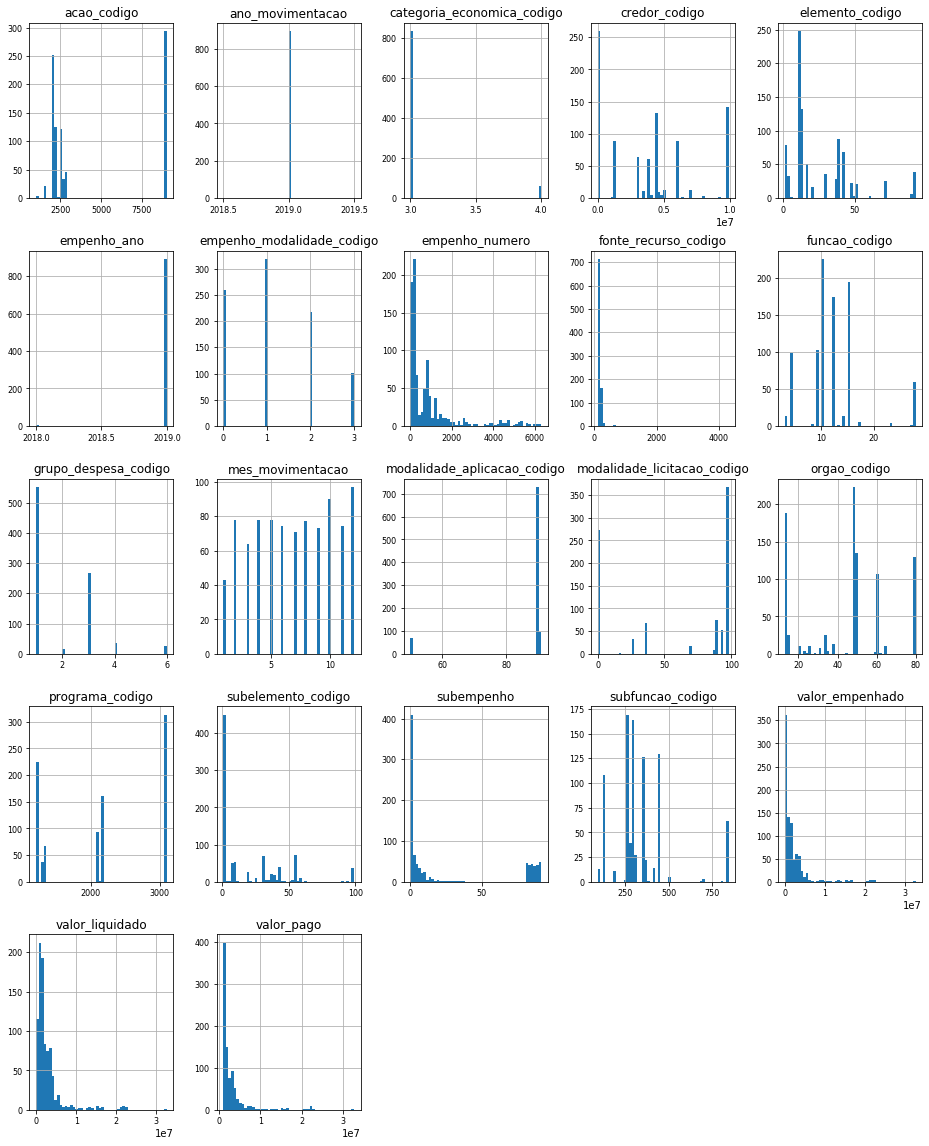

In [10]:
df_num.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8); # ; avoid having the matplotlib verbose informations

In [11]:
df_num_corr = df_num.corr()['valor_pago'][:-1] # -1 because the latest row is SalePrice
golden_features_list = df_num_corr[abs(df_num_corr) > 0.5].sort_values(ascending=False)
print("There is {} strongly correlated values with SalePrice:\n{}".format(len(golden_features_list), golden_features_list))

There is 2 strongly correlated values with SalePrice:
valor_liquidado    0.967665
valor_empenhado    0.912451
Name: valor_pago, dtype: float64


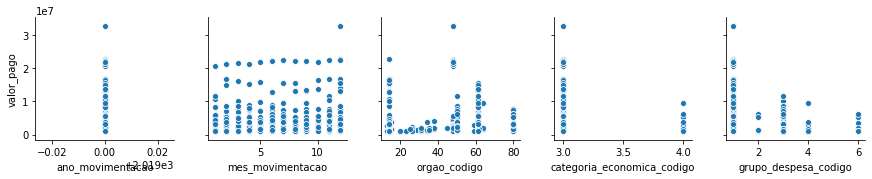

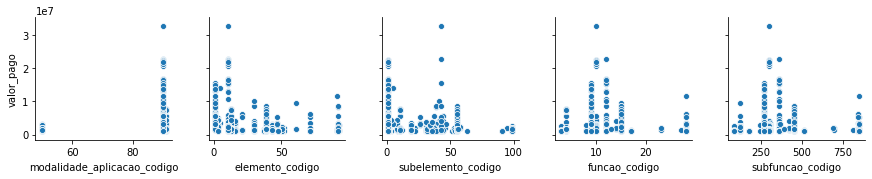

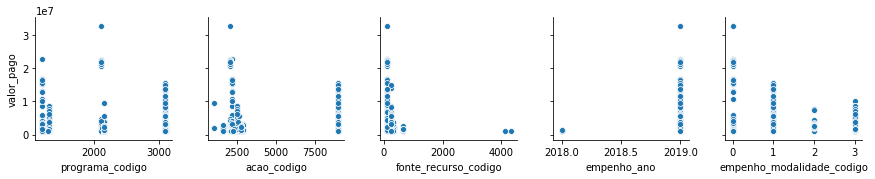

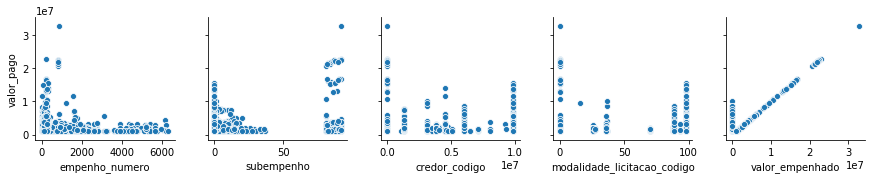

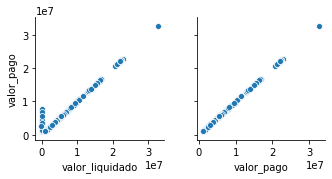

In [12]:
for i in range(0, len(df_num.columns), 5):
    sns.pairplot(data=df_num,
                x_vars=df_num.columns[i:i+5],
                y_vars=['valor_pago'])



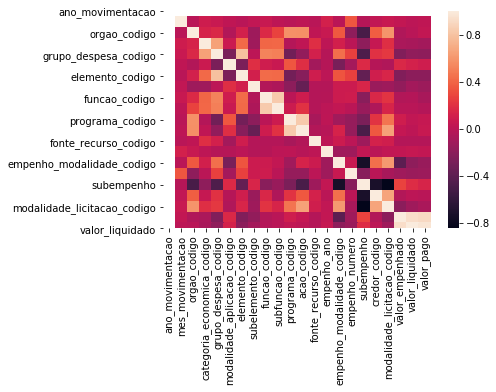

In [17]:
sns.heatmap(df.corr())
